In [11]:
import numpy as np
import matplotlib.pyplot as plt
class NeuralNetwork():
    """
    Neural Network

    """
    def __init__(self, X, y, eta=0.01, num_epochs=100, batch_size=32):
        self.X = X
        self.y = y
        self.w = np.random.randn(X.shape[1])  # vector of size equal to number of features
        self.b = np.random.randn()  # scalar bias term
        self.eta = eta  # learning rate
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.losses = []

    def compute_loss(self, y_true, y_pred) -> float:
      """
      Mean Squared Error given as 1/n * (sum(Y_i - Yhat_i) **2)
      """

      return np.mean((y_true - y_pred)**2)  # MSE

    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        Parameters:
          X: Numpy Array of Features
        Returns:
          prediction: Numpy Array that results from the dot product of X and W, then adding b
        """
        return np.dot(X, self.w) + self.b

    def train(self):
        num_samples = self.X.shape[0]

        for epoch in range(self.num_epochs):
            # Random shuffle
            indices = np.arange(num_samples)
            np.random.shuffle(indices)
            X = self.X[indices]
            y = self.y[indices]

            epoch_loss = 0

            for start in range(0, num_samples, self.batch_size):
                end = min(start + self.batch_size, num_samples)
                X_batch = X[start:end]
                y_batch = y[start:end]

                # Forward pass
                y_pred = self.predict(X_batch)

                # Compute gradients
                error = y_pred - y_batch # L
                w_grad = np.dot(X_batch.T, error) / (end - start) # del w wrt L
                b_grad = np.mean(error) # del b wrt L

                # Update Step
                self.w -= self.eta * w_grad
                self.b -= self.eta * b_grad

                # Accumulate batch loss
                epoch_loss += self.compute_loss(y_batch, y_pred) * (end - start)

            # Compute average loss for the epoch
            epoch_loss /= num_samples
            self.losses.append(epoch_loss)

            print(f"Epoch: {epoch+1}, Loss: {epoch_loss:.6f}")

    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        test_loss = self.compute_loss(y_test, y_pred)
        return test_loss

    def plot_loss(self):
        """
        Plot the loss over epochs
        """
        plt.figure(figsize=(10, 6))
        plt.plot(range(1, len(self.losses) + 1), self.losses)
        plt.title('Loss over Epochs')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.grid(True)
        plt.show()

    def get_params(self):
        return {'weights': self.w, 'bias': self.b, 'Batch Size': self.batch_size, 'Learning Rate' : self.eta, 'Batch Size' : self.batch_size, 'Final Loss': self.losses[-1]}


In [2]:
# random vars for x and y

num_samples = 100 #'rows' of the dataset
num_features = 2 # 'cols' of the dataset
X = np.random.randn(num_samples, num_features)
Y = np.random.randn(num_samples)
print(X)
print (X.shape)
print(Y)
print (Y.shape)

[[-5.62091476e-01  4.39520719e-01]
 [ 1.92923423e-01 -2.51599996e-01]
 [ 1.13873025e+00 -8.34185905e-01]
 [-1.44952380e+00  5.12049919e-01]
 [-2.59820417e-01 -2.90288723e-01]
 [-6.43959182e-03  8.83716288e-02]
 [-1.09768637e+00 -4.96689133e-02]
 [-9.15114281e-01  1.08977576e+00]
 [ 1.93258308e+00  2.17432007e-01]
 [ 1.27661279e-01  6.26499064e-01]
 [ 4.73445771e-01  8.63285843e-01]
 [-1.00176366e+00  8.24883546e-02]
 [-1.62041459e+00 -1.43724934e+00]
 [-5.54261041e-01  8.17172058e-01]
 [-2.70284813e-02 -2.09640557e+00]
 [-1.77886310e+00  7.21302312e-01]
 [-3.83252626e-01 -3.54745153e-01]
 [-1.12687649e-02 -6.41455355e-01]
 [ 1.31055725e+00 -9.48631653e-01]
 [-1.39043420e-01 -3.83047640e-01]
 [ 9.59398471e-01  2.86453056e-01]
 [-4.90468755e-01  6.15002451e-02]
 [-1.04956031e+00  2.59395287e-01]
 [-8.76680593e-01 -7.36229417e-01]
 [-2.51983361e+00  2.18617886e-01]
 [-1.22820616e+00 -2.78947376e-01]
 [-5.54011754e-01 -3.98952223e-01]
 [ 1.42586124e+00  1.34038676e+00]
 [ 8.19032261e-01  2

In [13]:
# testing NN on data generated above
model = NeuralNetwork(X = X, y = Y, num_epochs = 100)
model_res = model.train()



Epoch: 1, Loss: 2.940020
Epoch: 2, Loss: 2.808938
Epoch: 3, Loss: 2.669018
Epoch: 4, Loss: 2.543614
Epoch: 5, Loss: 2.417113
Epoch: 6, Loss: 2.317894
Epoch: 7, Loss: 2.214190
Epoch: 8, Loss: 2.107565
Epoch: 9, Loss: 2.014532
Epoch: 10, Loss: 1.917981
Epoch: 11, Loss: 1.825644
Epoch: 12, Loss: 1.740909
Epoch: 13, Loss: 1.651639
Epoch: 14, Loss: 1.588537
Epoch: 15, Loss: 1.531490
Epoch: 16, Loss: 1.486503
Epoch: 17, Loss: 1.440036
Epoch: 18, Loss: 1.400878
Epoch: 19, Loss: 1.352915
Epoch: 20, Loss: 1.310463
Epoch: 21, Loss: 1.278178
Epoch: 22, Loss: 1.252087
Epoch: 23, Loss: 1.212470
Epoch: 24, Loss: 1.187751
Epoch: 25, Loss: 1.165957
Epoch: 26, Loss: 1.145838
Epoch: 27, Loss: 1.122451
Epoch: 28, Loss: 1.107163
Epoch: 29, Loss: 1.091267
Epoch: 30, Loss: 1.077597
Epoch: 31, Loss: 1.059611
Epoch: 32, Loss: 1.044332
Epoch: 33, Loss: 1.024672
Epoch: 34, Loss: 1.013047
Epoch: 35, Loss: 1.003009
Epoch: 36, Loss: 0.992282
Epoch: 37, Loss: 0.980646
Epoch: 38, Loss: 0.977960
Epoch: 39, Loss: 0.97

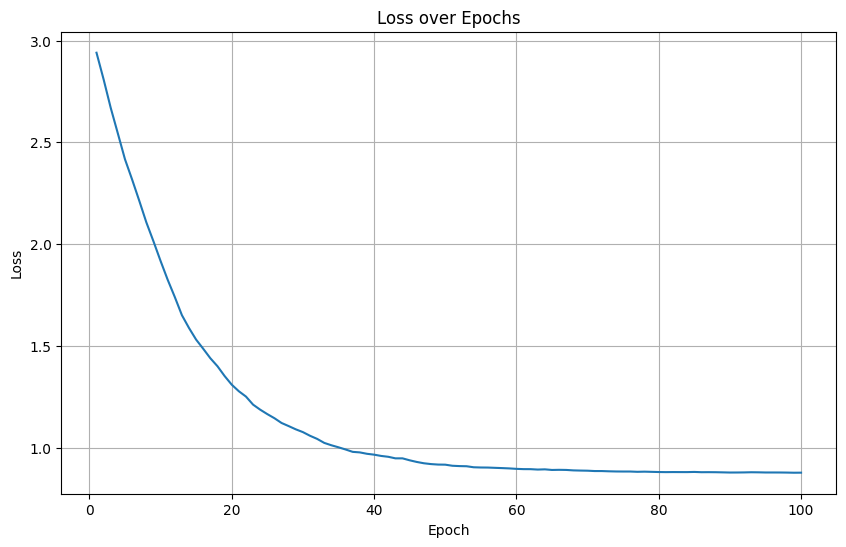

In [14]:
model.plot_loss()

In [15]:
model.get_params()

{'weights': array([-0.03301493, -0.04132095]),
 'bias': np.float64(0.052358348049746636),
 'Batch Size': 32,
 'Learning Rate': 0.01,
 'Final Loss': np.float64(0.8784853383340768)}